In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
import emcee
import corner
from multiprocess import Pool
from astropy.table import Table
import pygtc

In [3]:
samples = np.load("../../data/MCMC/sampler_results_sep20.npy")
print("steps:", samples.shape[0])
print("walkers:", samples.shape[1])
print("dim:", samples.shape[2])

steps: 500
walkers: 500
dim: 4


In [4]:
jsm_last_sample = samples[-1,:,:]
jsm_last_sample

array([[ 1.72690376, -0.28787321,  0.71635974, 10.05019045],
       [ 2.60355979,  0.13891926,  0.52249146, 10.2324926 ],
       [ 1.98566701, -0.12304768,  0.76415355,  9.96852611],
       ...,
       [ 2.04878472, -0.11328892,  0.07955319, 10.19919066],
       [ 1.69945807, -0.19743009,  0.3935786 ,  9.88080094],
       [ 1.87726392, -0.17568484,  0.42702964, 10.12046682]])

In [5]:
final_step = Table.read("../../../Downloads/MCMC_step_1000.dat", format="ascii")
a1 = final_step["col1"].data
a2 = final_step["col2"].data
a3 = final_step["col3"].data
a4 = final_step["col4"].data

fvdb_last_sample = np.array([a1, a2, a3, a4]).T
fvdb_last_sample

array([[ 1.5365  , -0.48345 ,  0.22676 , 10.045   ],
       [ 2.5697  ,  0.040561,  0.78071 , 10.21    ],
       [ 1.3398  , -0.48274 ,  0.19885 ,  9.7285  ],
       ...,
       [ 1.7023  , -0.30574 ,  0.17025 ,  9.9106  ],
       [ 3.3292  ,  0.39066 ,  0.88954 , 10.215   ],
       [ 2.3816  , -0.015829,  0.44075 , 10.185   ]])

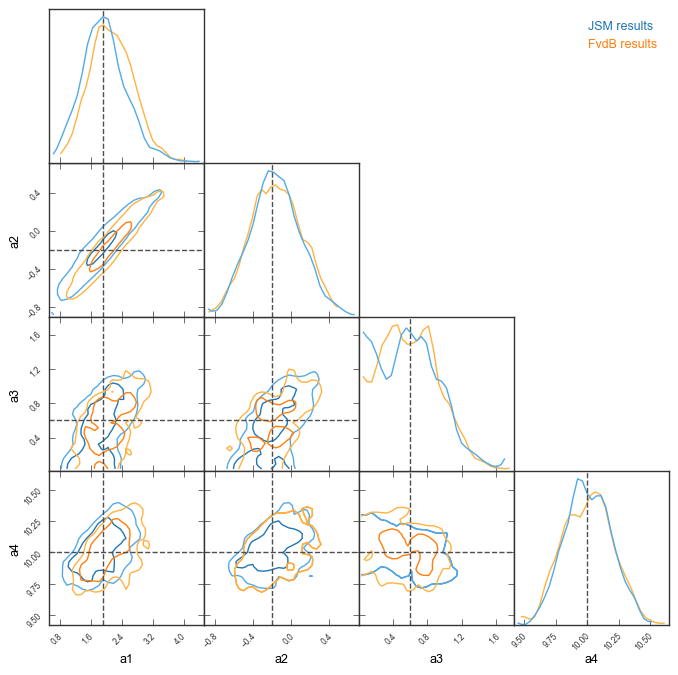

In [12]:
names = ['a1', 'a2', 'a3', 'a4']

# Labels for the different chains
chainLabels = ["JSM results", "FvdB results"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((1, 3), (-2, 1), (0, 3), (9,11))

truths = [1.9, -0.2, 0.6, 10]

GTC = pygtc.plotGTC(chains=[jsm_last_sample,fvdb_last_sample], 
                    paramNames=names,
                    chainLabels=chainLabels,
                    truths=truths,
                    figureSize=8,
                    filledPlots=False)

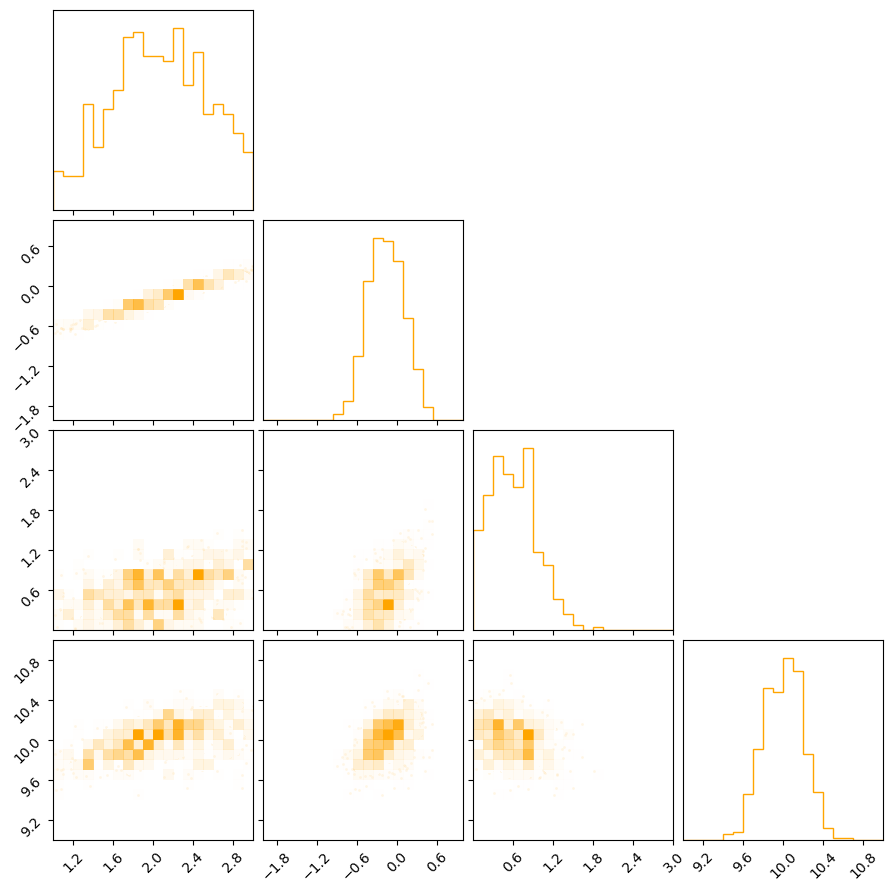

In [20]:
figure = corner.corner(fvdb_last_sample, plot_contours=False,  color="orange", plot_datapoints=True, range=[(1, 3), (-2, 1), (0, 3), (9,11)])
plt.show()

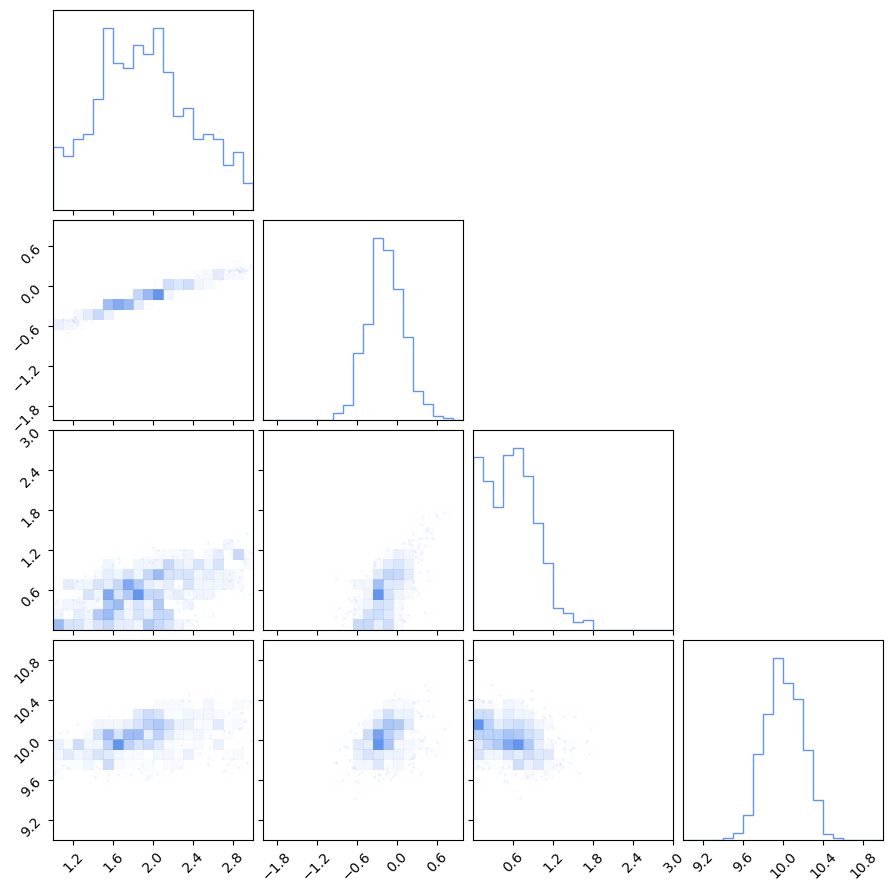

In [21]:
figure = corner.corner(jsm_last_sample, plot_contours=False, color="cornflowerblue", plot_datapoints=True, range=[(1, 3), (-2, 1), (0, 3), (9,11)])
plt.show()

In [ ]:
# samples = np.load("../../data/MCMC/sampler_results_sep17.npy")
# last_sample = samples[-1,:,:]
# fig = corner.corner(last_sample_F, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
# fig = corner.corner(last_sample, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False)
# figure = corner.corner(last_sample_F, plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
# corner.corner(last_sample, fig=figure, color='red', plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
# plt.show()

# names = ['alpha', 'delta', 'sigma']

# # Labels for the different chains
# chainLabels = ["JSM results", "F vdB results"]

# # List of Gaussian curves to plot
# #(to represent priors): mean, width
# # Empty () or None if no prior to plot
# priors = ((1, 3), (-2, 1), (0, 3))

# truths = [1.9, -0.2, 0.6]

# GTC = pygtc.plotGTC(chains=[last_sample,last_sample_F], 
#                     paramNames=names,
#                     chainLabels=chainLabels,
#                     truths=truths,
#                     figureSize=8,
#                     filledPlots=True)

